In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datetime
from glob import glob

In [3]:
from config import *
from binance.client import Client
from BinanceFuturesPy.futurespy import Client as cf

client = Client(api_key, api_secret)
clientf = cf(api_key, api_secret)# , testnet=True)

In [5]:
csv = glob("d*bo*.csv")
csv

['data_book.csv',
 'data_book_21_09_2021_07_53_56.csv',
 'data_book_21_09_2021_09_35_43.csv',
 'data_book_21_09_2021_10_45_19.csv',
 'data_book_21_09_2021_12_33_06.csv',
 'data_book_21_09_2021_20_27_36.csv',
 'data_book_21_09_2021_21_43_23.csv',
 'data_book_22_09_2021_06_58_13.csv']

In [7]:
df = pd.read_csv(csv[-2], sep="|", low_memory=False, parse_dates=[0], index_col=0)
df.index = pd.DatetimeIndex(pd.to_datetime(df.index, unit='ms')).tz_localize('UTC').tz_convert('America/Lima')
df = df.dropna()
# c = list(df.columns)
# C = np.array(c).reshape(-1, 4)
df

,stdb_10,stda_10,volb_10,volba_10,stdb_500,stda_500,volb_500,volba_500
dtime,,,,,,,,
2021-09-21 21:43:32.185000-05:00,482971300.9,97732812.6,0.775,1.183,5.123646e+09,5.977135e+09,21.462,25.235
2021-09-21 21:43:32.948000-05:00,431541739.8,128851736.6,0.775,1.183,5.090504e+09,5.831248e+09,21.114,24.714
2021-09-21 21:43:33.725000-05:00,376915058.5,261066015.4,0.775,1.183,5.062063e+09,5.935349e+09,21.382,25.298
2021-09-21 21:43:34.546000-05:00,368084330.1,189113479.1,0.894,1.183,5.017660e+09,5.889433e+09,21.014,24.727
2021-09-21 21:43:36.665000-05:00,217429396.4,226941020.3,0.894,1.095,4.889607e+09,5.919368e+09,22.222,24.807
...,...,...,...,...,...,...,...,...
2021-09-22 06:58:02.474000-05:00,403940313.0,339856244.1,1.095,0.632,5.053455e+09,5.072916e+09,21.429,18.105
2021-09-22 06:58:02.725000-05:00,267008467.6,348940949.7,0.894,0.632,4.906155e+09,5.058534e+09,20.871,18.428
2021-09-22 06:58:02.966000-05:00,267008467.6,348940949.7,0.894,0.632,4.902551e+09,5.082754e+09,20.924,18.628


In [43]:
cs = np.array(df.columns).reshape(-1, 4)
# cs
sp = 90
sp = 900
data_10 = df[cs[0]].resample(f"{sp}s").sum()
data_500 = df[cs[1]].resample(f"{sp}s").sum()
data_10.shape

(38, 4)

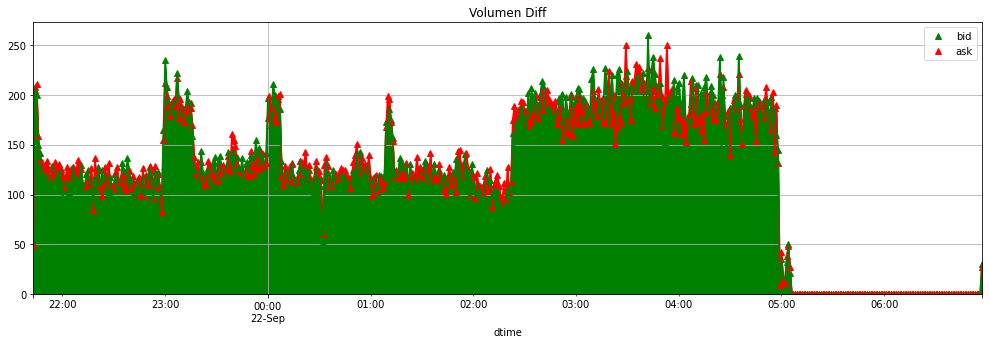

In [12]:

ll = int(data_10.shape[0]*.0)
# nk = 
fig = plt.figure(figsize=(17, 5))
data_10['volb_10'][ll:-1].plot(color='green', style="^")
data_10['volba_10'][ll:-1].plot(color='red', style="^")
data_10['volba_10'][ll:-1].plot(color='red', kind='area')
data_10['volb_10'][ll:-1].plot(color='green', kind='area')
# data['stda'][:-1].plot(color='red')
# data['stdb'][:-1].plot(color='green')
plt.title("Volumen Diff")
plt.legend(['bid', "ask"])
# plt.ylim([0, 44000])
plt.grid()

# fig = plt.figure(figsize=(17, 5))
# data_500['stdb_500'][ll:-1].plot(color='green', style="^")
# data_500['stda_500'][ll:-1].plot(color='red', style="^")
# data_500['stda_500'][ll:-1].plot(color='red', kind='area')
# data_500['stdb_500'][ll:-1].plot(color='green', kind='area')
# # data['stda'][:-1].plot(color='red')
# # data['stdb'][:-1].plot(color='green')
# plt.title("std Diff")
# plt.legend(['bid', "ask"])
# # plt.ylim([0, 44000])
# plt.grid()

37


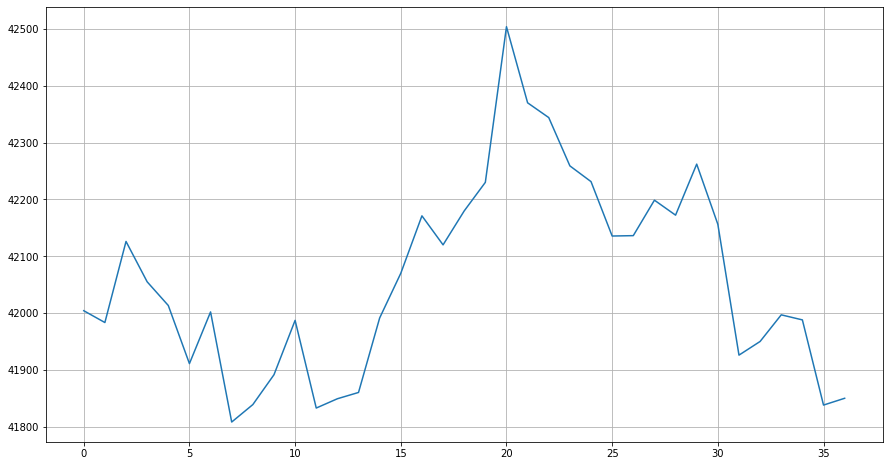

In [13]:
L3m = client.futures_historical_klines(symbol='BTCUSDT',
                      interval=client.KLINE_INTERVAL_15MINUTE,
                      start_str=str(df.index[0]),
                      end_str=str(df.index[-1])
                      # start_str='2021-07-01 02:00:00',
                      # end_str='2021-07-07 02:00:00',
                      # start_str='2021-09-06 22:00:00',
                      # end_str='2021-09-12 09:00:00',
                      # end_str='2021-09-13 09:00:00',
                      #limit=1500
                                      )
print(len(L3m))
arr = np.array(L3m, dtype=np.float)
M3 = arr[:, 3]#[69:]
fig = plt.figure(figsize=(15, 8))
plt.plot(M3)
# plt.plot(M3, "x", c='b')
plt.grid()
plt.show()

In [32]:
index = pd.DatetimeIndex(pd.to_datetime(arr[:, 0], unit='ms')).tz_localize('UTC').tz_convert('America/Lima')
df_serie = pd.DataFrame(arr[:, 3], index=index)
df_serie.shape

(37, 1)

In [118]:
dw = pd.concat([df_serie, data_10, data_500], axis=1)
dw

,0,stdb_10,stda_10,volb_10,volba_10,stdb_500,stda_500,volb_500,volba_500
2021-09-21 21:30:00-05:00,NaN,6.922607e+10,5.214197e+10,258.918,253.682,1.334691e+12,1.586015e+12,6372.942,6841.635
2021-09-21 21:45:00-05:00,42004.11,5.482543e+11,7.349987e+11,1911.807,2025.010,1.176007e+13,1.217922e+13,57215.917,43329.123
2021-09-21 22:00:00-05:00,41983.31,6.592903e+11,5.521009e+11,1696.514,1808.574,1.047258e+13,1.129260e+13,50967.468,37007.400
2021-09-21 22:15:00-05:00,42126.01,5.116989e+11,7.771173e+11,1666.837,1718.334,1.071803e+13,1.112495e+13,51669.106,34602.819
2021-09-21 22:30:00-05:00,42054.99,5.731617e+11,7.474237e+11,1738.523,1709.082,1.136608e+13,1.140784e+13,49108.866,46720.711
2021-09-21 22:45:00-05:00,42013.30,5.560101e+11,5.792091e+11,1710.699,1721.764,1.055377e+13,1.014610e+13,45458.835,44950.798
2021-09-21 23:00:00-05:00,41911.00,1.211134e+12,8.996189e+11,2930.474,2868.524,1.837314e+13,1.789739e+13,78634.612,85208.391
2021-09-21 23:15:00-05:00,42001.96,6.704401e+11,8.715330e+11,1970.686,1958.761,1.282946e+13,1.364479e+13,58033.276,51844.273
2021-09-21 23:30:00-05:00,41808.19,6.771770e+11,7.958437e+11,1959.728,1968.778,1.223384e+13,1.261330e+13,49103.457,59514.189
2021-09-21 23:45:00-05:00,41838.90,5.925397e+11,8.141420e+11,2021.136,1924.479,1.177400e+13,1.247391e+13,44643.970,50796.750


In [128]:
dw[0][1:-9]

2021-09-21 21:45:00-05:00    42004.11
2021-09-21 22:00:00-05:00    41983.31
2021-09-21 22:15:00-05:00    42126.01
2021-09-21 22:30:00-05:00    42054.99
2021-09-21 22:45:00-05:00    42013.30
2021-09-21 23:00:00-05:00    41911.00
2021-09-21 23:15:00-05:00    42001.96
2021-09-21 23:30:00-05:00    41808.19
2021-09-21 23:45:00-05:00    41838.90
2021-09-22 00:00:00-05:00    41891.43
2021-09-22 00:15:00-05:00    41987.14
2021-09-22 00:30:00-05:00    41832.82
2021-09-22 00:45:00-05:00    41849.17
2021-09-22 01:00:00-05:00    41860.24
2021-09-22 01:15:00-05:00    41991.32
2021-09-22 01:30:00-05:00    42070.01
2021-09-22 01:45:00-05:00    42171.10
2021-09-22 02:00:00-05:00    42120.00
2021-09-22 02:15:00-05:00    42179.71
2021-09-22 02:30:00-05:00    42230.00
2021-09-22 02:45:00-05:00    42503.97
2021-09-22 03:00:00-05:00    42370.00
2021-09-22 03:15:00-05:00    42344.00
2021-09-22 03:30:00-05:00    42259.00
2021-09-22 03:45:00-05:00    42231.30
2021-09-22 04:00:00-05:00    42135.55
2021-09-22 0

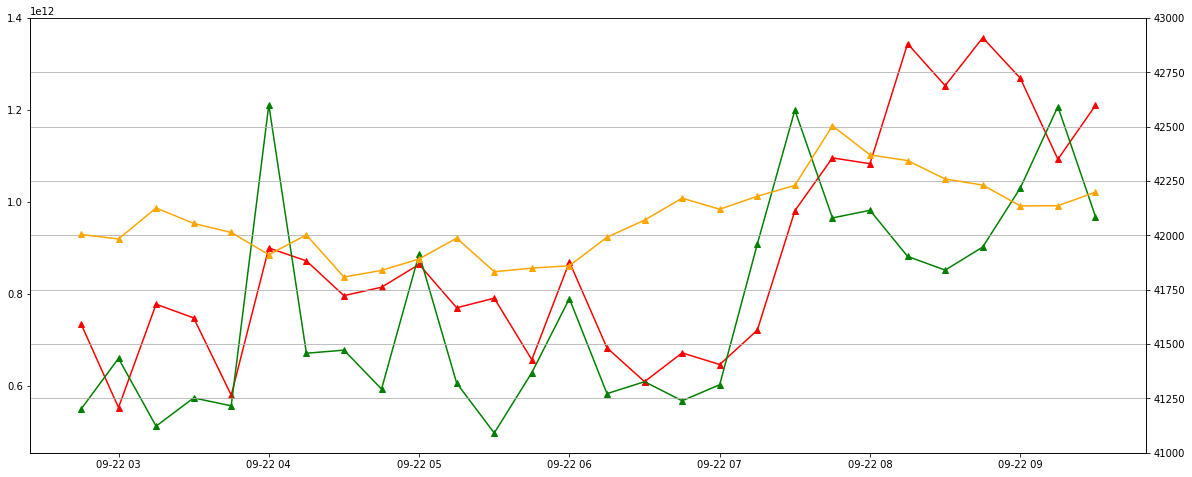

In [134]:
fig, ax1 = plt.subplots(figsize=(20, 8))
ax2 = ax1.twinx()
# SOLO ACTIVOS
# ax2.plot(df_serie.index, df_serie[0][:], color='orange')
# df_serie.plot(color='yellow', style="^", ax=ax2)
ax2.plot(dw[0][1:-9], "^", color='orange')
ax2.plot(dw[0][1:-9], color='orange')

# ax1.plot(dw['volb_10'][1:-9], "^", color='green')
# ax1.plot(dw['volba_10'][1:-9], "^", color='red')
# ax1.plot(dw['volba_10'][1:-9], color='red')
# ax1.plot(dw['volb_10'][1:-9], color='green')

ax1.plot(dw['stdb_10'][1:-9], "^", color='green')
ax1.plot(dw['stda_10'][1:-9], "^", color='red')
ax1.plot(dw['stda_10'][1:-9], color='red')
ax1.plot(dw['stdb_10'][1:-9], color='green')

# ax1.plot(dw['volb_500'][1:-9], "^", color='green')
# ax1.plot(dw['volba_500'][1:-9], "^", color='red')
# ax1.plot(dw['volba_500'][1:-9], color='red')
# ax1.plot(dw['volb_500'][1:-9], color='green')

# ax1.plot(dw['stdb_500'][1:-9], "^", color='green')
# ax1.plot(dw['stda_500'][1:-9], "^", color='red')
# ax1.plot(dw['stda_500'][1:-9], color='red')
# ax1.plot(dw['stdb_500'][1:-9], color='green')

# ax1.bar(data_10.index[:-1], data_10['volb_10'][:-1], width=0.3, color='blue', kind='area')
# ax1.bar(data_10.index[:-1], data_10['volba_10'][:-1], width=0.3, color='orange', kind='area')

# ax2.legend(['klines', 'volBid', 'volAsk'])
# ax1.set_ylabel('USD($)')
# ax2.set_ylabel('Porcentaje (%)')
ax1_ylims = ax1.axes.get_ylim()
ax1_yratio = ax1_ylims[0] / ax1_ylims[1]
ax2_ylims = ax2.axes.get_ylim()
ax2_yratio = ax2_ylims[0] / ax2_ylims[1]
if ax1_yratio < ax2_yratio:
    ax2.set_ylim(bottom = ax2_ylims[1]*ax1_yratio)
else:
    ax1.set_ylim(bottom = ax1_ylims[1]*ax2_yratio)
ax2.set_ylim(bottom=41000, top=43000)
plt.xlabel("Fecha")
plt.grid()
plt.show()

In [129]:
dw[0][1:-9].shape

(28,)

In [ ]:
dr = pd.DataFrame([1, 2, 3], col)